In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [57]:
df = pd.read_csv("data.csv", index_col="Date", parse_dates=True)

In [58]:
scaler = MinMaxScaler()
df[['Open', 'High', 'Low', 'Close']] = scaler.fit_transform(df[['Open', 'High', 'Low', 'Close']])

In [59]:
df.head()

,Open,High,Low,Close
Date,,,,
2023-10-10,0.969391,0.973914,0.970734,0.974015
2023-10-09,0.968037,0.967253,0.966327,0.964836
2023-10-06,0.972272,0.971740,0.971976,0.972135
2023-10-05,0.967125,0.966633,0.966680,0.966564
2023-10-04,0.963211,0.960474,0.958708,0.960893


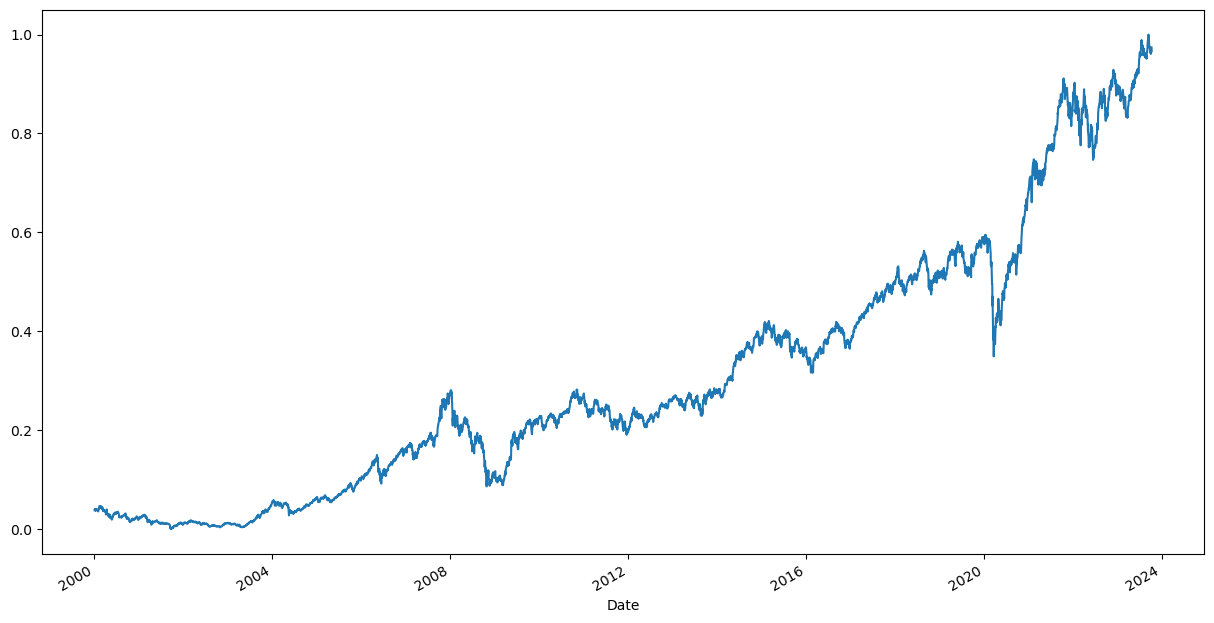

In [60]:
plt.figure(figsize=(15,8))
df['Close'].plot();

In [61]:
look_back = 10

def create_lagged_features(data, look_back = 30):
    x, y = [], []
    for i in range(len(data) - look_back):
        x.append(data[['Open', 'High', 'Low', 'Close']].iloc[i:i + look_back].values)
        y.append(data['Close'].iloc[i + look_back])
    return np.array(x), np.array(y)

In [62]:
x, y = create_lagged_features(df, look_back)

In [63]:
train_size = int(len(x) * 0.8)
x_train, x_test = x[:train_size], x[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [64]:
model = Sequential([
    LSTM(64, input_shape=(look_back, 4)),  # LSTM layer to handle 3D input
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

In [65]:
model.compile(loss='mean_squared_error', optimizer='adam')

model.fit(x_train, y_train, epochs=70, verbose=1)

Epoch 1/70
148/148 [==============================] - 1s 3ms/step - loss: 0.0048
Epoch 2/70
148/148 [==============================] - 0s 2ms/step - loss: 9.3918e-05
Epoch 3/70
148/148 [==============================] - 0s 2ms/step - loss: 9.2319e-05
Epoch 4/70
148/148 [==============================] - 0s 2ms/step - loss: 8.2685e-05
Epoch 5/70
148/148 [==============================] - 0s 2ms/step - loss: 9.0190e-05
Epoch 6/70
148/148 [==============================] - 0s 2ms/step - loss: 7.0172e-05
Epoch 7/70
148/148 [==============================] - 0s 2ms/step - loss: 7.1721e-05
Epoch 8/70
148/148 [==============================] - 0s 2ms/step - loss: 7.0524e-05
Epoch 9/70
148/148 [==============================] - 0s 2ms/step - loss: 6.8097e-05
Epoch 10/70
148/148 [==============================] - 0s 2ms/step - loss: 5.8418e-05
Epoch 11/70
148/148 [==============================] - 0s 2ms/step - loss: 5.5049e-05
Epoch 12/70
148/148 [==============================] - 0s 2ms/step 

In [66]:
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean Square Error:", mse)

37/37 [==============================] - 0s 2ms/step
Mean Square Error: 4.619040053020848e-07


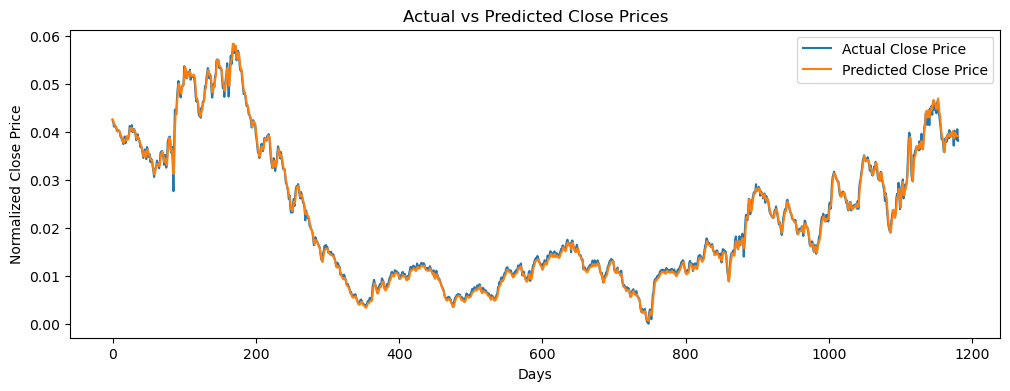

In [67]:
plt.figure(figsize=(12, 4))

plt.plot(y_test, label='Actual Close Price')
plt.plot(y_pred, label='Predicted Close Price')

plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Days')
plt.ylabel('Normalized Close Price')
plt.legend()
plt.show()